In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv("balanced_data.csv")

X = data.drop(columns=['label'])  
y = data['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping


X = data.drop(columns=['label']) 
y = data['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary _crossentropy', metrics=['accuracy'])
    return model

model = create_model(input_shape=(X_train.shape[1], 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

scores = model.evaluate(X_test, y_test)

print(f'Test Loss: {scores[0]}')
print(f'Test Accuracy: {scores[1]}')


Epoch 1/10
223/223 [==============================] - 165s 647ms/step - loss: 0.3200 - accuracy: 0.8564 - val_loss: 0.1636 - val_accuracy: 0.9422
Epoch 2/10
223/223 [==============================] - 138s 620ms/step - loss: 0.1224 - accuracy: 0.9554 - val_loss: 0.2306 - val_accuracy: 0.8990
Epoch 3/10
223/223 [==============================] - 141s 632ms/step - loss: 0.0794 - accuracy: 0.9745 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 4/10
223/223 [==============================] - 138s 618ms/step - loss: 0.0542 - accuracy: 0.9788 - val_loss: 0.0650 - val_accuracy: 0.9798
Epoch 5/10
223/223 [==============================] - 148s 666ms/step - loss: 0.0421 - accuracy: 0.9843 - val_loss: 0.0469 - val_accuracy: 0.9848
Epoch 6/10
223/223 [==============================] - 152s 681ms/step - loss: 0.0312 - accuracy: 0.9891 - val_loss: 0.0546 - val_accuracy: 0.9815
Epoch 7/10
223/223 [==============================] - 138s 621ms/step - loss: 0.0389 - accuracy: 0.9867 - val_loss: 0.0376 -

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.callbacks import EarlyStopping

# Assuming data is already defined and loaded

X = data.drop(columns=['label']) 
y = data['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def create_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
    return model

model = create_model(input_shape=(X_train.shape[1], 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluating model
scores = model.evaluate(X_test, y_test)
print(f'Test Loss: {scores[0]}')
print(f'Test Accuracy: {scores[1]}')
print(f'Test Precision: {scores[2]}')
print(f'Test Recall: {scores[3]}')

# Predictions
y_pred = model.predict_classes(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot Precision
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

# Plot Recall
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()


Epoch 1/10
 11/223 [>.............................] - ETA: 53s - loss: 0.7270 - accuracy: 0.5938 - precision: 0.6093 - recall: 0.5227

KeyboardInterrupt: 

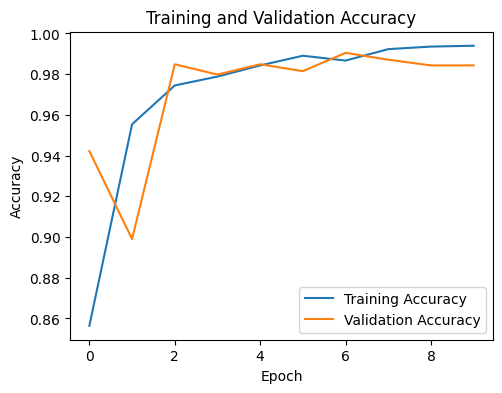

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


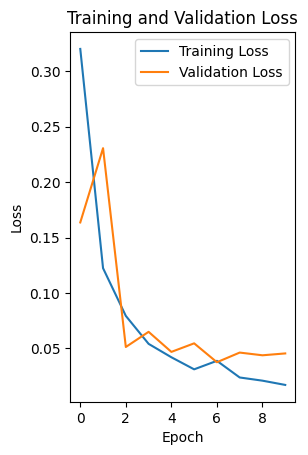

In [10]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:

import pickle

# Save the model to a file
with open('trained_model_CSV.pkl', 'wb') as file:
    pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\max_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2024-05-05 21:08:06         3130
metadata.json                                  2024-05-05 21:08:06           64

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(178, 257, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(TimeDistributed(Flatten()))  # Add TimeDistributed to apply Flatten to each time step
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Adjust for binary or multi-class

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()